In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Simulate some time series data
np.random.seed(0)
dates = pd.date_range(start='2023-01-01', periods=100, freq='H')
data = pd.DataFrame({
    'timestamp': dates,
    'pH': np.random.normal(loc=7, scale=0.5, size=100),
    'Turbidity': np.random.normal(loc=5, scale=1, size=100),
    'DO': np.random.normal(loc=8, scale=0.5, size=100)
})
data.set_index('timestamp', inplace=True)

# Display the first few rows of the dataset
print(data.head())


                           pH  Turbidity        DO
timestamp                                         
2023-01-01 00:00:00  7.882026   6.883151  7.815409
2023-01-01 01:00:00  7.200079   3.652241  7.880310
2023-01-01 02:00:00  7.489369   3.729515  8.549830
2023-01-01 03:00:00  8.120447   5.969397  8.327632
2023-01-01 04:00:00  7.933779   3.826877  8.320066


               pH   Turbidity          DO
count  100.000000  100.000000  100.000000
mean     7.029904    5.082013    7.970384
std      0.506480    1.039879    0.478399
min      5.723505    2.776597    6.613704
25%      6.678072    4.254570    7.701718
50%      7.047048    5.024655    7.962321
75%      7.368539    5.847480    8.269328
max      8.134877    7.383145    9.151958


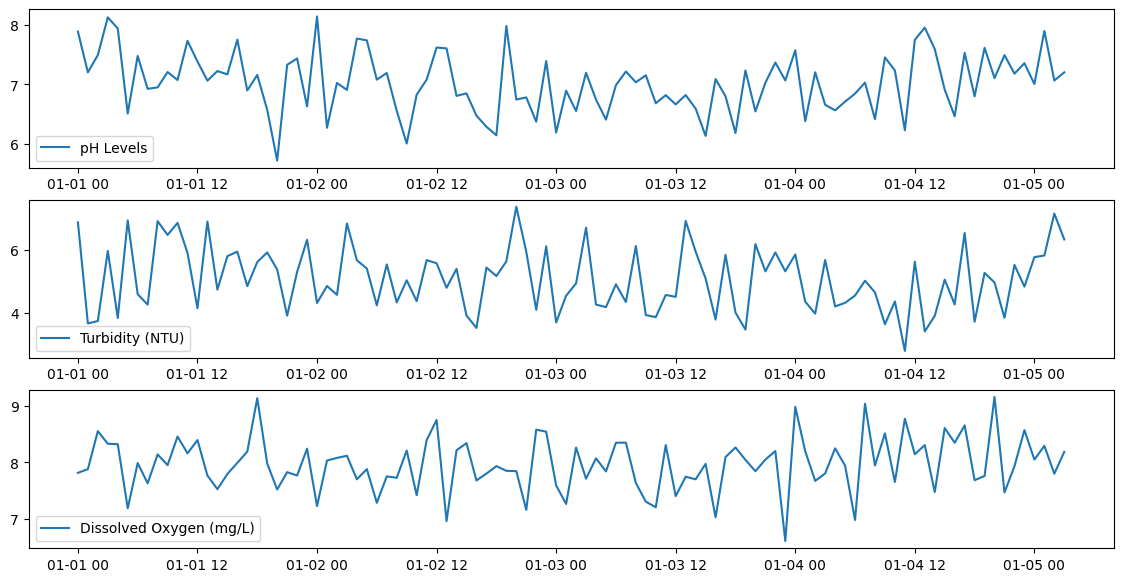

In [ ]:
# Exploratory Data Analysis (EDA)
print(data.describe())

# Plot the time series data
plt.figure(figsize=(14, 7))
plt.subplot(3, 1, 1)
plt.plot(data['pH'], label='pH Levels')
plt.legend(loc='best')
plt.subplot(3, 1, 2)
plt.plot(data['Turbidity'], label='Turbidity (NTU)')
plt.legend(loc='best')
plt.subplot(3, 1, 3)
plt.plot(data['DO'], label='Dissolved Oxygen (mg/L)')
plt.legend(loc='best')
plt.show()


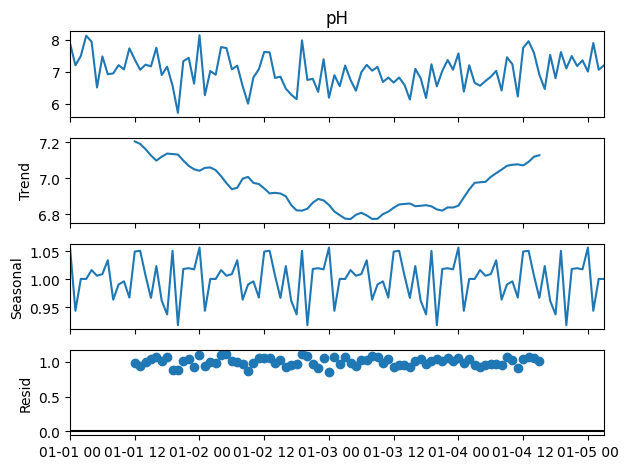

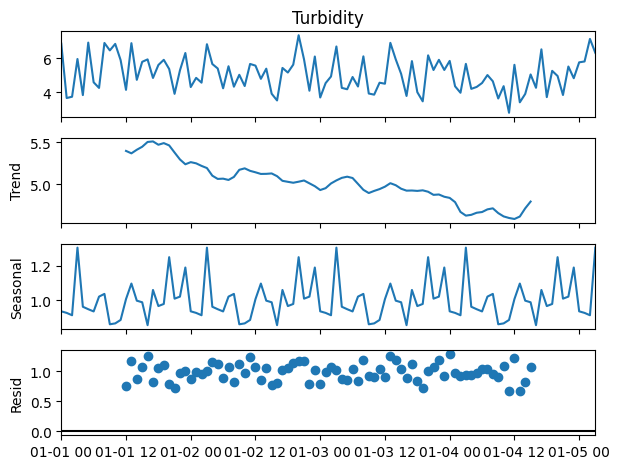

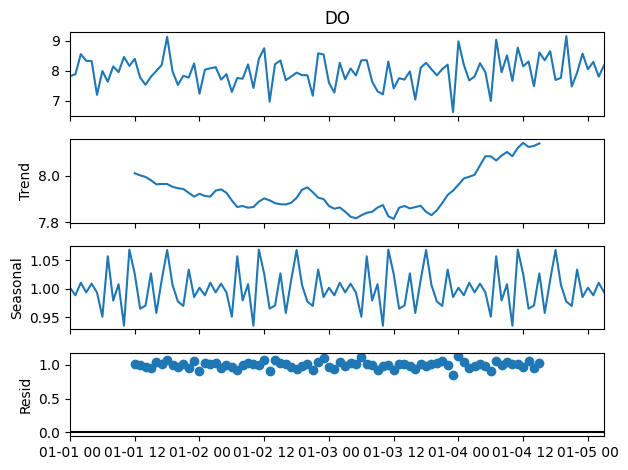

In [ ]:
# Data Preprocessing
data = data.dropna()  # Handle missing values

# Time Series Decomposition
decompose_pH = seasonal_decompose(data['pH'], model='multiplicative', period=24)
decompose_pH.plot()
plt.show()

decompose_Turbidity = seasonal_decompose(data['Turbidity'], model='multiplicative', period=24)
decompose_Turbidity.plot()
plt.show()

decompose_DO = seasonal_decompose(data['DO'], model='multiplicative', period=24)
decompose_DO.plot()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dat

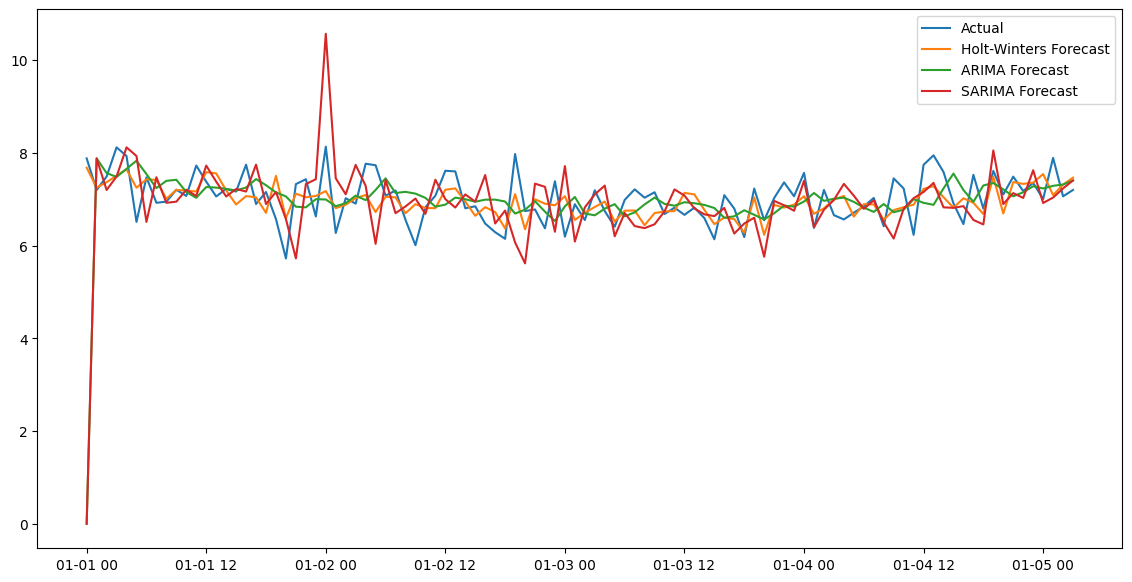

In [ ]:
# Exponential Smoothing (Holt-Winters)
model_hw_pH = ExponentialSmoothing(data['pH'], trend='add', seasonal='add', seasonal_periods=24).fit()
data['pH_HW_Forecast'] = model_hw_pH.fittedvalues

# ARIMA Model
model_arima_pH = ARIMA(data['pH'], order=(5, 1, 0)).fit()
data['pH_ARIMA_Forecast'] = model_arima_pH.fittedvalues

# SARIMA Model
model_sarima_pH = SARIMAX(data['pH'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24)).fit()
data['pH_SARIMA_Forecast'] = model_sarima_pH.fittedvalues

# Plotting forecasts
plt.figure(figsize=(14, 7))
plt.plot(data['pH'], label='Actual')
plt.plot(data['pH_HW_Forecast'], label='Holt-Winters Forecast')
plt.plot(data['pH_ARIMA_Forecast'], label='ARIMA Forecast')
plt.plot(data['pH_SARIMA_Forecast'], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()


In [ ]:
# Evaluate the models
def evaluate_model(actual, predicted):
    mse = mean_squared_error(actual, predicted)
    mape = mean_absolute_percentage_error(actual, predicted)
    rmse = np.sqrt(mse)
    return mse, mape, rmse

mse_hw, mape_hw, rmse_hw = evaluate_model(data['pH'], data['pH_HW_Forecast'])
mse_arima, mape_arima, rmse_arima = evaluate_model(data['pH'], data['pH_ARIMA_Forecast'])
mse_sarima, mape_sarima, rmse_sarima = evaluate_model(data['pH'], data['pH_SARIMA_Forecast'])

print(f'Holt-Winters - MSE: {mse_hw}, MAPE: {mape_hw}, RMSE: {rmse_hw}')
print(f'ARIMA - MSE: {mse_arima}, MAPE: {mape_arima}, RMSE: {rmse_arima}')
print(f'SARIMA - MSE: {mse_sarima}, MAPE: {mape_sarima}, RMSE: {rmse_sarima}')


Holt-Winters - MSE: 0.18644630964669603, MAPE: 0.05030126313534503, RMSE: 0.4317942908917347
ARIMA - MSE: 0.8914409195760663, MAPE: 0.07010004919209877, RMSE: 0.9441614901996725
SARIMA - MSE: 1.0978515668441429, MAPE: 0.08510160608733232, RMSE: 1.0477841222523574


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dat

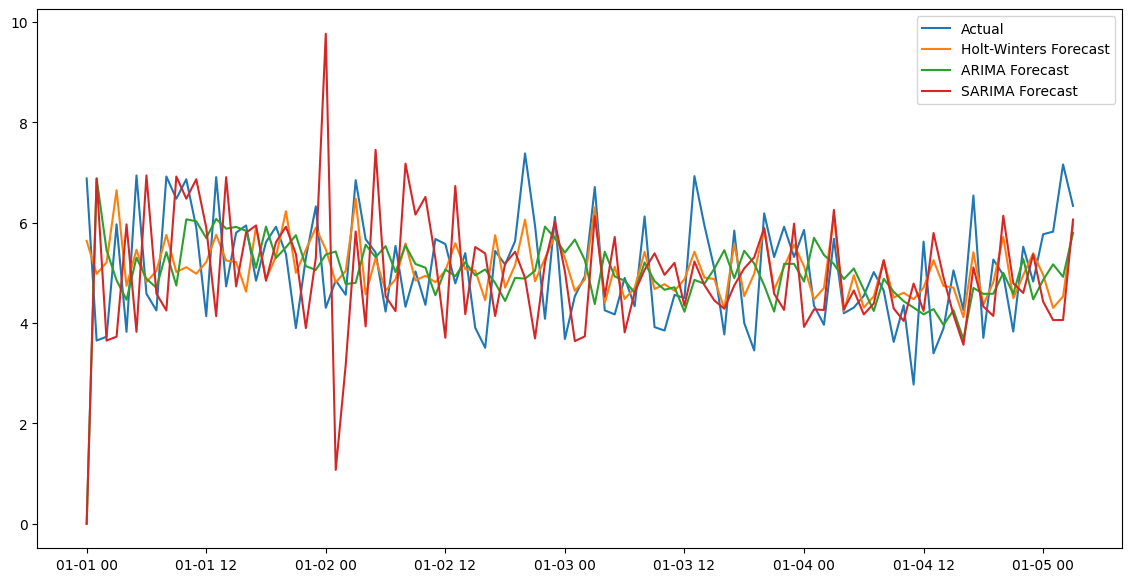

In [ ]:
# Holt-Winters for Turbidity
model_hw_turb = ExponentialSmoothing(data['Turbidity'], trend='add', seasonal='add', seasonal_periods=24).fit()
data['Turb_HW_Forecast'] = model_hw_turb.fittedvalues

# ARIMA for Turbidity
model_arima_turb = ARIMA(data['Turbidity'], order=(5, 1, 0)).fit()
data['Turb_ARIMA_Forecast'] = model_arima_turb.fittedvalues

# SARIMA for Turbidity
model_sarima_turb = SARIMAX(data['Turbidity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24)).fit()
data['Turb_SARIMA_Forecast'] = model_sarima_turb.fittedvalues

# Plot forecasts for Turbidity
plt.figure(figsize=(14, 7))
plt.plot(data['Turbidity'], label='Actual')
plt.plot(data['Turb_HW_Forecast'], label='Holt-Winters Forecast')
plt.plot(data['Turb_ARIMA_Forecast'], label='ARIMA Forecast')
plt.plot(data['Turb_SARIMA_Forecast'], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()


In [ ]:
# Evaluate the models for Turbidity
mse_hw_turb, mape_hw_turb, rmse_hw_turb = evaluate_model(data['Turbidity'], data['Turb_HW_Forecast'])
mse_arima_turb, mape_arima_turb, rmse_arima_turb = evaluate_model(data['Turbidity'], data['Turb_ARIMA_Forecast'])
mse_sarima_turb, mape_sarima_turb, rmse_sarima_turb = evaluate_model(data['Turbidity'], data['Turb_SARIMA_Forecast'])

print(f'Turbidity - Holt-Winters - MSE: {mse_hw_turb}, MAPE: {mape_hw_turb}, RMSE: {rmse_hw_turb}')
print(f'Turbidity - ARIMA - MSE: {mse_arima_turb}, MAPE: {mape_arima_turb}, RMSE: {rmse_arima_turb}')
print(f'Turbidity - SARIMA - MSE: {mse_sarima_turb}, MAPE: {mape_sarima_turb}, RMSE: {rmse_sarima_turb}')


Turbidity - Holt-Winters - MSE: 0.7926144878846515, MAPE: 0.15490163240308708, RMSE: 0.8902889912183861
Turbidity - ARIMA - MSE: 1.6678213647178142, MAPE: 0.19255541771191365, RMSE: 1.2914415839354927
Turbidity - SARIMA - MSE: 2.838864121081305, MAPE: 0.2629851386516481, RMSE: 1.6848929108644577


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dat

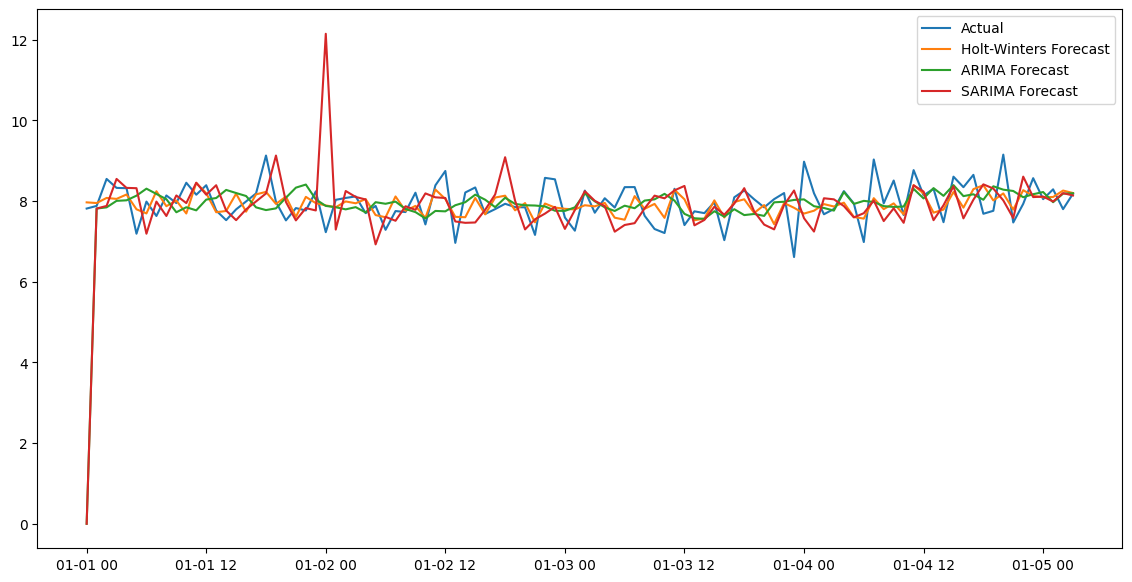

In [ ]:
# Holt-Winters for DO
model_hw_do = ExponentialSmoothing(data['DO'], trend='add', seasonal='add', seasonal_periods=24).fit()
data['DO_HW_Forecast'] = model_hw_do.fittedvalues

# ARIMA for DO
model_arima_do = ARIMA(data['DO'], order=(5, 1, 0)).fit()
data['DO_ARIMA_Forecast'] = model_arima_do.fittedvalues

# SARIMA for DO
model_sarima_do = SARIMAX(data['DO'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 24)).fit()
data['DO_SARIMA_Forecast'] = model_sarima_do.fittedvalues

# Plot forecasts for DO
plt.figure(figsize=(14, 7))
plt.plot(data['DO'], label='Actual')
plt.plot(data['DO_HW_Forecast'], label='Holt-Winters Forecast')
plt.plot(data['DO_ARIMA_Forecast'], label='ARIMA Forecast')
plt.plot(data['DO_SARIMA_Forecast'], label='SARIMA Forecast')
plt.legend(loc='best')
plt.show()


In [ ]:
# Evaluate the models for DO
mse_hw_do, mape_hw_do, rmse_hw_do = evaluate_model(data['DO'], data['DO_HW_Forecast'])
mse_arima_do, mape_arima_do, rmse_arima_do = evaluate_model(data['DO'], data['DO_ARIMA_Forecast'])
mse_sarima_do, mape_sarima_do, rmse_sarima_do = evaluate_model(data['DO'], data['DO_SARIMA_Forecast'])

print(f'DO - Holt-Winters - MSE: {mse_hw_do}, MAPE: {mape_hw_do}, RMSE: {rmse_hw_do}')
print(f'DO - ARIMA - MSE: {mse_arima_do}, MAPE: {mape_arima_do}, RMSE: {rmse_arima_do}')
print(f'DO - SARIMA - MSE: {mse_sarima_do}, MAPE: {mape_sarima_do}, RMSE: {rmse_sarima_do}')


DO - Holt-Winters - MSE: 0.1886224936305684, MAPE: 0.04340040969353908, RMSE: 0.4343069117923043
DO - ARIMA - MSE: 0.8595903641712294, MAPE: 0.05967329520917687, RMSE: 0.9271409624060569
DO - SARIMA - MSE: 1.1949384139820622, MAPE: 0.0764970576717064, RMSE: 1.093132386301889
